Базовую (примитивную) визуализацию можно выполнить с помощью уже знакомой нам библиотеки Pandas. Функционал для создания основных типов графиков уже включён в библиотеку.

Примечание. Для визуализации Pandas использует библиотеку matplotlib, о которой мы поговорим в следующем юните. Если попробовать воспользоваться методами визуализации Pandas без предварительной установки matplotlib, вы получите ошибку ImportError. Для установки библиотеки используется стандартная команда, которую нужно выполнить в терминале: </br>
``pip install matplotlib``</br>
или в ячейке ноутбука:</br>
``! pip install matplotlib``
______________________________

                              БАЗОВАЯ ВИЗУАЛИЗАЦИЯ В PANDAS

Основным методом для создания простейших графиков в Pandas является plot().

``Основные параметры метода plot()``

 - x — название признака, который будет отложен по оси абсцисс;
 - y — название признака, который будет отложен по оси ординат;
 - figsize — размер графика (кортеж из ширины и высоты в дюймах);
 - kind —тип визуализации. Основные типы:
    - 'line' — линейный график (по умолчанию);
    - 'bar' — столбчатая диаграмма;
    - 'barh' — горизонтальная столбчатая диаграмма;
    - 'hist' — гистограмма;
    - 'box' — коробчатая диаграмма (boxplot);
    - 'pie' — круговая диаграмма;
    - 'scatter' — диаграмма рассеяния.
 - grid — отображение сетки (по умолчанию False);
 - legend — отображение легенды (по умолчанию False);
 - title — название графика;
 - color — цвет.
 
Давайте попрактикуемся в использовании метода plot().

Начнём с исследования заболеваемости коронавирусом во всём мире. Для этого первым делом отобразим, как менялось ежедневное число заболевших (daily_confirmed) во всём мире во времени. Далее сгруппируем таблицу по датам и подсчитаем суммарное число зафиксированных случаев по дням.

Теперь мы наконец можем построить график с помощью метода plot(). Будем использовать ``линейный график`` размером 12x4 (попробуйте взять другие числа, чтобы увидеть разницу). Подпишем график и отобразим сетку. Параметр lw (line width) отвечает за ширину линии для линейного графика.

In [3]:
import pandas as pd

In [2]:
covid_df = pd.read_csv('data/covid_df.csv') 
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.head()

,Unnamed: 0,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


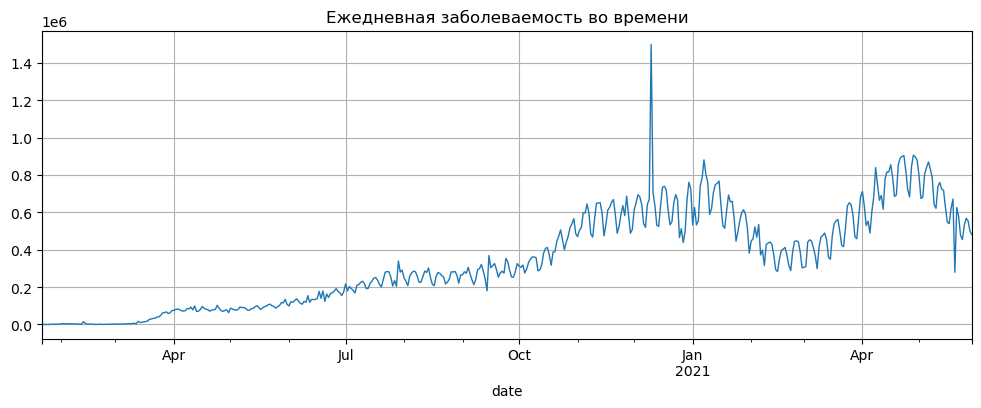

In [23]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=1
);

Примечание. Обратите внимание, что мы не использовали параметры x и y. Это связано с тем, что в нашем случае переменная grouped_cases — это объект Series.

plot() может являться методом объекта типа DataFrame или Series. При типе DataFrame требуется указать х и у, либо будут построены графики всех столбцов. При типе Series в этом нет необходимости, ведь это и так всего один столбец данных (у) с индексами (х).

При этом по оси абсцисс (х) откладываются индексы (на сгруппированных данных grouped_cases индексы — это даты), а по оси ординат (у) — значения показателей.

*Здесь и далее в модуле точка с запятой в последней строке кода используется во избежание вывода на экран служебной информации в ноутбуке (попробуйте её убрать и посмотрите, что будет).*

Теперь построим ``гистограмму``, которая покажет распределение ежедневной заболеваемости во всём мире. Для этого параметр kind выставляем на значение 'hist'. Параметр bins (корзины) отвечает за число прямоугольников в гистограмме — пусть их будет 10 (попробуйте использовать другие числа, чтобы увидеть разницу).

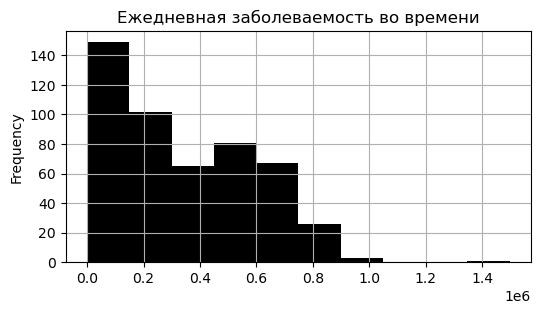

In [22]:
grouped_cases.plot(kind ='hist', title='Ежедневная заболеваемость во времени', grid=True, figsize=(6, 3), color='black', bins=10);

По гистограмме можно судить о частоте попадания ежедневной заболеваемости в определённый интервал. На оси абсцисс отложен диапазон ежедневной заболеваемости (в млн человек), разбитый на десять равных интервалов, на оси ординат — число наблюдений, попавших в этот интервал.

Мы видим модальное значение около нуля (от 0 до примерно 150 тыс. заболеваний в день), то есть большинство наблюдений сосредоточено в первом интервале, далее частота постепенно падает. Это связано с тем, что долгое время распространение вируса было довольно слабым.</br>
В глаза бросается «пенёк», соответствующий резкой вспышке заболеваемости, которую мы видели ранее. Его высота очень мала, ведь такое наблюдение единственное. Даже на гистограмме кажется, что данное наблюдение является аномальным и, скорее всего, представляет собой выброс.

Давайте построим ``столбчатую диаграмму``, которая покажет ТОП-10 стран по суммарной заболеваемости.

Для этого сгруппируем данные по странам и вычислим последний зафиксированный показатель с помощью агрегирующего метода last() — он возвращает последнее значение в столбце DataFrame.

Для построения столбчатой диаграммы значение параметра kind выставляем на 'bar'. Параметр colormap отвечает за цветовую гамму графика.

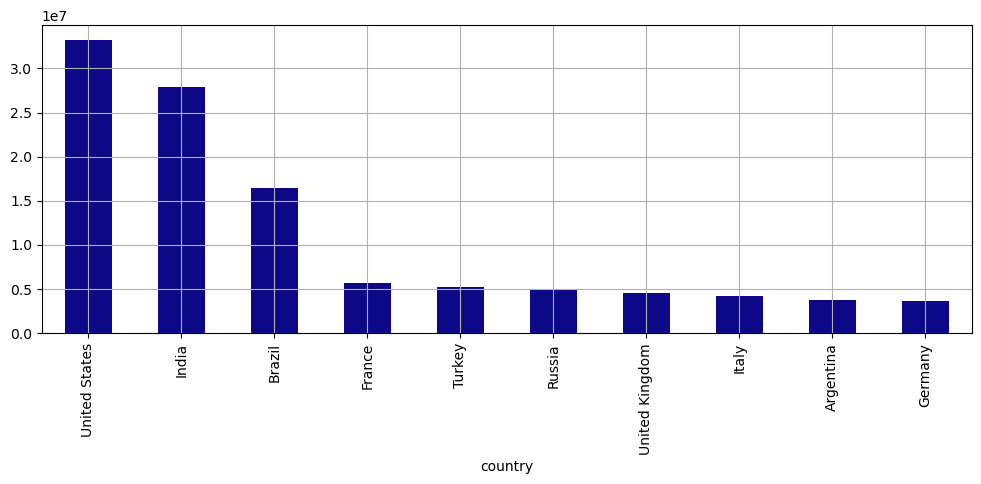

In [31]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

На диаграмме видно, что лидерами по числу заболевших являются Соединённые Штаты, Индия и Бразилия. Соотношение зафиксированных случаев заражения в остальных странах примерно одинаковое.

А теперь посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса. Для этого отобразим сразу два показателя на ``столбчатой диаграмме``: 

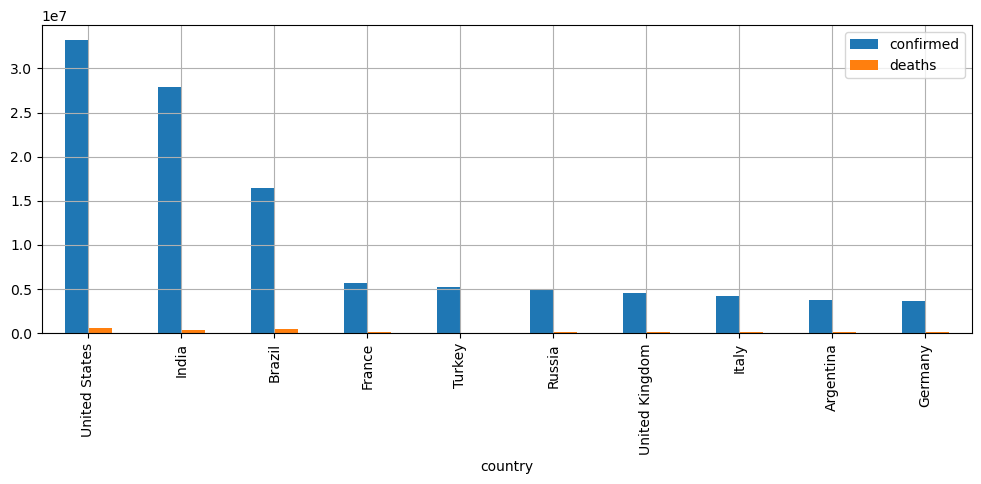

In [44]:
grouped_country=covid_df.groupby(['country'])[['confirmed','deaths']].last()
grouped_country=grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(kind='bar', grid=True, figsize=(12,4));

Этот график является небольшим усовершенствованием предыдущего. Теперь на нём можно увидеть соотношение зафиксированных случаев заражения и смертей.

Очевидно, что отношение числа умерших к числу заболевших весьма низкое. Также это может косвенно говорить о разных методиках учёта заболевших (например, какие-то страны могут учитывать заболевших только по мазку, в то время как другие — по клинической картине, учитывающей и другие показатели). То есть с методической точки зрения учёт по числу заражений может быть не совсем корректным. Лучшим показателем будет являться число смертей (хотя и этот метод не идеален).

Более того, если построить график с сортировкой не по числу заболевших, а по числу умерших, поменяются и места, и страны в рейтинге. Попробуйте построить такой график сами!
___________________________________________

``Визуализация с помощью Pandas является удобным инструментом, когда графики необходимо построить «здесь и сейчас», не сильно заботясь об их внешнем виде. Однако такой подход имеет значительный минус по сравнению с использованием специализированных библиотек для визуализации — довольно ограниченный функционал:``
 - С помощью Pandas можно построить лишь базовый набор диаграмм. Для построения более сложных видов визуализации Pandas не подходит.</br>
 - Трудно настроить визуализацию нескольких видов графиков одновременно в разных масштабах.</br>
 - Сложно (иногда и вовсе невозможно) корректировать внешний вид графика.</br>
 - Отсутствует 3D-визуализация.

Задание 4.1</br>
***За выбор типа визуализации в методе plot() библиотеки Pandas отвечает параметр:</br>***
type
diagram
**``kind``**
bins

Задание 4.2</br>
``Загляните в документацию по методу plot() и найдите параметр, который отвечает за установку названия оси ординат:``</br>
title
xlabel
yaxis
```ylabel```

Задание 4.3</br>
С помощью какого из перечисленных ниже вариантов кода можно получить такой график</br>
 - Подсказка (1 из 4): Из названия оси ординат ясно, что график должен быть построен для ежедневно фиксируемого числа смертей во всём мире.</br>
 - Подсказка (2 из 4): Чтобы построить график, необходимо сгруппировать таблицу по дате и рассчитать сумму столбца daily_deaths. Таким образом получится суммарное число смертей в мире по дням.</br>
 - Подсказка (3 из 4): Далее на сгруппированных данных необходимо построить линейный график (параметр kind='line').</br>
 - Подсказка (4 из 4): Для установки названий осей используются параметры xlabel и ylabel.</br>

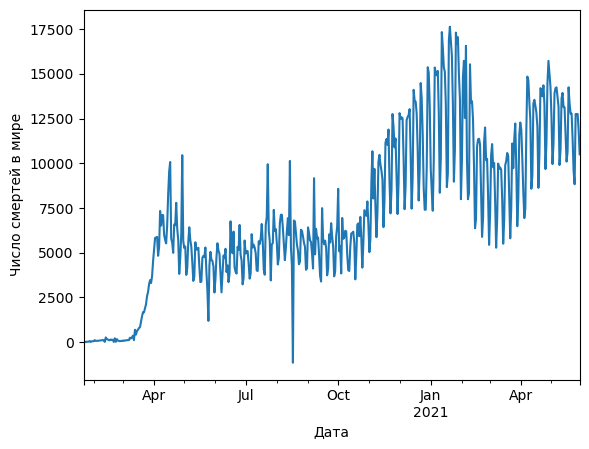

In [46]:
grouped_cases = covid_df.groupby('date')['daily_deaths'].sum()
grouped_cases.plot(kind='line',xlabel='Дата', ylabel='Число смертей в мире');

Задание 4.4</br>
С помощью какого из перечисленных ниже вариантов кода можно построить столбчатую диаграмму для пяти стран с наименьшим общим числом вакцинаций на последний день рассматриваемого периода (total_vaccinations)?</br>
В данном задании мы используем метод nsmallest(), который позволяет выбрать n наименьших значений в Series, а также метод last(), с помощью которого можно получить первое непустое значение в группах.</br>

  - Подсказка (1 из 4): Сгруппируйте данные по странам.
  - Подсказка (2 из 4): Вычислите последнее зафиксированное число заболевших (last в столбце total_vaccinations).
  - Подсказка (3 из 4): Выберите ТОП-5 стран по минимальному значению этого показателя с помощью метода nsmallest().
  - Подсказка (4 из 4): Вызовите метод plot() с параметром kind='bar'.

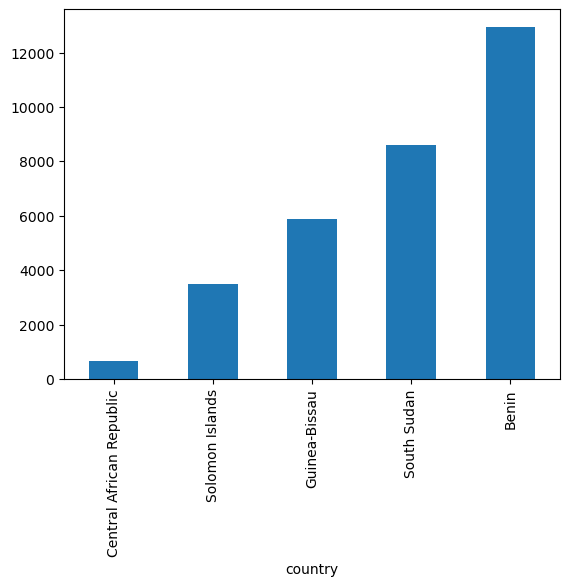

In [48]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');